# MNIST Classification - Five Layer NN

In [73]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import numpy as np
from matplotlib import pyplot as plt
tf.set_random_seed(0)

In [74]:
# download train and test data (28x28 images of handwritten digits)
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [75]:
# input X: 28x28 grayscale images, the first dimension (None) will index the images in the mini-batch
X = tf.placeholder(tf.float32, [None, 28, 28, 1])

# correct answers will go here
Y_ = tf.placeholder(tf.float32, [None, 10])

# weights
W1 = tf.Variable(tf.truncated_normal([784, 200], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([200, 100], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([100, 60], stddev=0.1))
W4 = tf.Variable(tf.truncated_normal([60, 30], stddev=0.1))
W5 = tf.Variable(tf.truncated_normal([30, 10], stddev=0.1))

# biases
b1 = tf.Variable(tf.zeros([200]))
b2 = tf.Variable(tf.zeros([100]))
b3 = tf.Variable(tf.zeros([60]))
b4 = tf.Variable(tf.zeros([30]))
b5 = tf.Variable(tf.zeros([10]))

In [76]:
# flatten the images into a single line of pixels
# -1 in the shape definition means "the only possible dimension that will preserve the number of elements"
XX = tf.reshape(X, [-1, 784])

In [77]:
# The model
Y1 = tf.nn.sigmoid(tf.matmul(XX, W1) + b1)
Y2 = tf.nn.sigmoid(tf.matmul(Y1, W2) + b2)
Y3 = tf.nn.sigmoid(tf.matmul(Y2, W3) + b3)
Y4 = tf.nn.sigmoid(tf.matmul(Y3, W4) + b4)
Z = tf.matmul(Y4, W5) + b5
Y = tf.nn.softmax(Z)

In [78]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Z, labels=Y_)
cross_entropy = tf.reduce_mean(cross_entropy)*100

In [79]:
# accuracy of the trained model, between 0 (worst) and 1 (best)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [80]:
# to keep track of max accuracy
max_accuracy = 0.0

In [81]:
train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

In [82]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

train_loss_log = []
test_loss_log = []
train_accuracy_log = []
test_accuracy_log = []

In [83]:
def training_step(i):

    global max_accuracy
    # training on batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)

    # compute training values
    if (i % 10 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y_: batch_Y})
        train_accuracy_log.append([i,a])
        train_loss_log.append([i,c])        
        print(str(i) + ": accuracy:" + str(a) + " loss: " + str(c))

    # compute test values
    if (i % 50 == 0):
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y_: mnist.test.labels})
        test_accuracy_log.append([i,a])
        test_loss_log.append([i,c])  
        if (a > max_accuracy):
            max_accuracy = a

        print(str(i) + ": $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:" + str(a) + " test loss: " + str(c))

    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y_: batch_Y})

In [84]:
# run this thang
for i in range(10000+1): 
    training_step(i)

0: accuracy:0.11 loss: 231.27466
0: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.101 test loss: 232.57434
10: accuracy:0.1 loss: 231.87239
20: accuracy:0.13 loss: 230.49815
30: accuracy:0.15 loss: 229.4874
40: accuracy:0.08 loss: 232.64719
50: accuracy:0.11 loss: 234.30724
50: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.1135 test loss: 231.33757
60: accuracy:0.09 loss: 230.2836
70: accuracy:0.12 loss: 232.12013
80: accuracy:0.15 loss: 230.72774
90: accuracy:0.11 loss: 230.09789
100: accuracy:0.09 loss: 230.04044
100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.1009 test loss: 230.98216
110: accuracy:0.13 loss: 230.29532
120: accuracy:0.05 loss: 231.91754
130: accuracy:0.1 loss: 230.08829
140: accuracy:0.11 loss: 230.25644
150: accuracy:0.12 loss: 228.95407
150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.101 test loss: 231.82578
160: accuracy:0.13 loss: 231.64241
170: accuracy:0.08 loss: 231.9829
180: accuracy:0.1 loss: 229.2289
190: accuracy:0.12 loss: 232.59079
200: accuracy:0.09 loss: 232.10318


1690: accuracy:0.55 loss: 130.42947
1700: accuracy:0.52 loss: 129.12326
1700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.4843 test loss: 131.14546
1710: accuracy:0.47 loss: 123.51
1720: accuracy:0.45 loss: 130.90436
1730: accuracy:0.47 loss: 147.48517
1740: accuracy:0.52 loss: 130.31259
1750: accuracy:0.52 loss: 129.94482
1750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.5148 test loss: 126.27131
1760: accuracy:0.57 loss: 129.57336
1770: accuracy:0.59 loss: 117.37847
1780: accuracy:0.49 loss: 120.87614
1790: accuracy:0.5 loss: 128.13007
1800: accuracy:0.57 loss: 116.8531
1800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.5216 test loss: 127.180954
1810: accuracy:0.45 loss: 127.75752
1820: accuracy:0.58 loss: 116.64995
1830: accuracy:0.56 loss: 107.06475
1840: accuracy:0.48 loss: 120.69211
1850: accuracy:0.66 loss: 114.44626
1850: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.5593 test loss: 111.05272
1860: accuracy:0.54 loss: 102.326225
1870: accuracy:0.58 loss: 115.72839
1880: accuracy:0.55 loss: 1

3330: accuracy:0.94 loss: 28.2848
3340: accuracy:0.91 loss: 24.823706
3350: accuracy:0.9 loss: 31.853521
3350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9185 test loss: 29.000286
3360: accuracy:0.93 loss: 22.579117
3370: accuracy:0.87 loss: 29.780525
3380: accuracy:0.89 loss: 33.737743
3390: accuracy:0.96 loss: 29.845655
3400: accuracy:0.84 loss: 49.75324
3400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9202 test loss: 28.566118
3410: accuracy:0.93 loss: 35.54203
3420: accuracy:0.96 loss: 14.164368
3430: accuracy:0.89 loss: 32.76986
3440: accuracy:0.93 loss: 20.875662
3450: accuracy:0.92 loss: 27.075523
3450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9168 test loss: 29.330162
3460: accuracy:0.95 loss: 26.839008
3470: accuracy:0.96 loss: 17.604567
3480: accuracy:0.91 loss: 32.090504
3490: accuracy:0.92 loss: 24.142689
3500: accuracy:0.98 loss: 15.063477
3500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9268 test loss: 26.399284
3510: accuracy:0.91 loss: 28.562609
3520: accuracy:0.91 loss: 24.9

4980: accuracy:0.95 loss: 17.292618
4990: accuracy:0.94 loss: 14.434009
5000: accuracy:0.96 loss: 21.301474
5000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9428 test loss: 20.330353
5010: accuracy:0.92 loss: 27.05353
5020: accuracy:0.95 loss: 18.070639
5030: accuracy:0.97 loss: 11.216997
5040: accuracy:0.93 loss: 14.28529
5050: accuracy:0.98 loss: 15.891203
5050: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9519 test loss: 17.301504
5060: accuracy:0.98 loss: 12.413266
5070: accuracy:0.92 loss: 28.109709
5080: accuracy:0.95 loss: 12.688765
5090: accuracy:0.95 loss: 18.167288
5100: accuracy:0.97 loss: 11.253885
5100: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.95 test loss: 17.146194
5110: accuracy:0.96 loss: 12.10866
5120: accuracy:0.94 loss: 14.054876
5130: accuracy:0.96 loss: 19.486042
5140: accuracy:0.95 loss: 21.685635
5150: accuracy:0.99 loss: 6.297674
5150: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9543 test loss: 15.850107
5160: accuracy:0.98 loss: 8.475597
5170: accuracy:0.96 loss: 22.28

6650: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9627 test loss: 13.119091
6660: accuracy:0.93 loss: 15.065676
6670: accuracy:0.97 loss: 9.287314
6680: accuracy:0.94 loss: 19.855577
6690: accuracy:0.96 loss: 9.606425
6700: accuracy:0.98 loss: 10.703996
6700: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9562 test loss: 14.66368
6710: accuracy:0.99 loss: 4.025
6720: accuracy:1.0 loss: 2.9017813
6730: accuracy:0.97 loss: 8.169577
6740: accuracy:0.98 loss: 9.406817
6750: accuracy:0.99 loss: 6.5972815
6750: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.964 test loss: 12.376419
6760: accuracy:0.96 loss: 13.738372
6770: accuracy:0.94 loss: 11.801908
6780: accuracy:0.98 loss: 7.508123
6790: accuracy:0.96 loss: 10.66649
6800: accuracy:0.95 loss: 12.535574
6800: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9638 test loss: 12.632988
6810: accuracy:0.98 loss: 4.8088856
6820: accuracy:0.97 loss: 11.396322
6830: accuracy:0.98 loss: 6.3832088
6840: accuracy:0.94 loss: 17.041313
6850: accuracy:0.96 loss: 11.311636
6

8350: accuracy:0.96 loss: 14.972403
8350: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9631 test loss: 12.494302
8360: accuracy:0.96 loss: 6.3549085
8370: accuracy:0.97 loss: 8.5848055
8380: accuracy:0.96 loss: 13.483916
8390: accuracy:0.96 loss: 9.172348
8400: accuracy:0.98 loss: 4.9337273
8400: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9558 test loss: 14.794318
8410: accuracy:0.97 loss: 6.444845
8420: accuracy:0.98 loss: 6.745023
8430: accuracy:0.99 loss: 2.7632222
8440: accuracy:0.98 loss: 4.749709
8450: accuracy:0.99 loss: 7.4314632
8450: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9688 test loss: 10.85004
8460: accuracy:0.97 loss: 5.6442847
8470: accuracy:0.99 loss: 3.604553
8480: accuracy:0.96 loss: 8.978184
8490: accuracy:0.99 loss: 4.2406683
8500: accuracy:0.98 loss: 4.8886857
8500: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.9604 test loss: 14.308354
8510: accuracy:1.0 loss: 1.8614378
8520: accuracy:1.0 loss: 2.2853746
8530: accuracy:0.98 loss: 5.249627
8540: accuracy:0.96 loss: 14.04353

10000: accuracy:0.99 loss: 3.2350886
10000: $$$$$$$$$$$$$$$$$$$$$$$$ test accuracy:0.967 test loss: 11.424347


In [85]:
print("max test accuracy: " + str(max_accuracy))

max test accuracy: 0.971


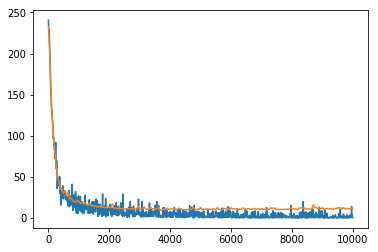

In [60]:
train_loss_log = np.array(train_loss_log)
test_loss_log = np.array(test_loss_log)

plt.plot(train_loss_log[:,0],train_loss_log[:,1])
plt.plot(test_loss_log[:,0],test_loss_log[:,1])
#plt.ylim(top=30, bottom=0)
plt.show()

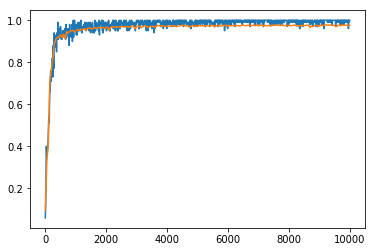

In [61]:
train_accuracy_log = np.array(train_accuracy_log)
test_accuracy_log = np.array(test_accuracy_log)

plt.plot(train_accuracy_log[:,0],train_accuracy_log[:,1])
plt.plot(test_accuracy_log[:,0],test_accuracy_log[:,1])
#plt.ylim(top = 1, bottom=.9)
plt.show()